**Data Science Engineering Methods and Tools**

**Assignment 1** **-** **ML Data Cleaning and Feature Selection**

**Name** - **Ronak Bhushan Patil**

**NUID** - **001007035**

**Abstract**

Air Bed and Breakfast also known as Airbnb is a service provided to travellers to rent space for multiple people for stay with Private Rooms,Entire Home/Apt and Shared Rooms. The aim of the notebook is to clean the the data set and select the best features to predict the target variable price.

# **Importing Libraries**

In [111]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

# **Uploading and Reading the Dataset**

In [112]:
airbnb=pd.read_csv("https://raw.githubusercontent.com/Ron-007/Datascience_Assignment/main/AB_NYC_2019.csv")
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# **Data Preprocessing and Cleaning**

In [113]:
airbnb.shape

(48895, 16)

**The dataset has 48895 observations in it and 16 columns which is a mix between categorical and numeric values.**

In [114]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [115]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**From the above describe function we can infer below few points** 

*   The average value of price is 152 but has a standard error of 240 and it ranges from 0 to 10000
*   The average value of availability_365 column is 112 and it ranges from 0 to 365


In [116]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**Checking the number of missing data values**

In [117]:
airbnb.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [118]:
airbnb.drop(['name','id', 'host_id','host_name','neighbourhood','last_review'], axis = 1, inplace = True)

**Dropping the independent variables such as name, id, host_id, host_name and neighbourhood due to large number of unique values which will not help in finding any correlation with target variable and last_review due to date format**

In [119]:
airbnb['reviews_per_month'].fillna(0, inplace=True)

**Filling the null values of reviews per month column with 0**

In [120]:
numerical_cols = ['latitude',
            'longitude',
            'price',
            'minimum_nights',
            'number_of_reviews',
            'reviews_per_month',
            'calculated_host_listings_count',
            'availability_365']
categorical_cols = ['room_type',
            'neighbourhood_group',
            ]

**Distributing Numerical and Categorical Features**

# **Visualization**

**Displaying data for numeric attributes with the help of heatmap**

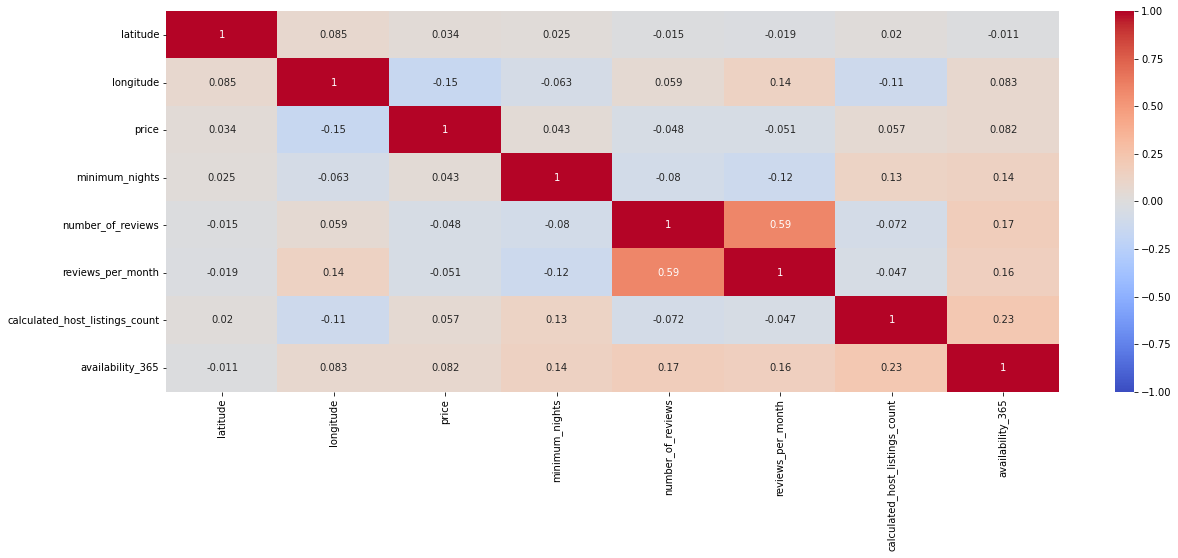

In [121]:
corr = airbnb[numerical_cols].corr()
ax , fig  = plt.subplots(figsize =(20,7))
sns.heatmap(corr ,vmin = -1 , cmap='coolwarm', annot = True)
plt.show()

**From the above heatmap we can infer that none of our variables are strongly coorelated**


**Displaying data for categorical attributes with the help of countplot and barplot**

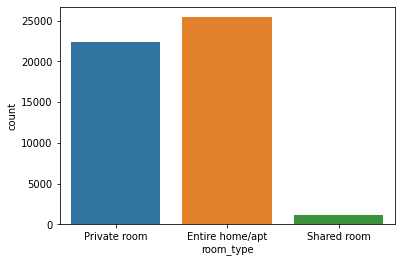

In [122]:
sns.countplot(x="room_type", data=airbnb);

**From the above countplot we can infer that the count of Entire Home/Apt is more followed by Private room type and Shared room**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


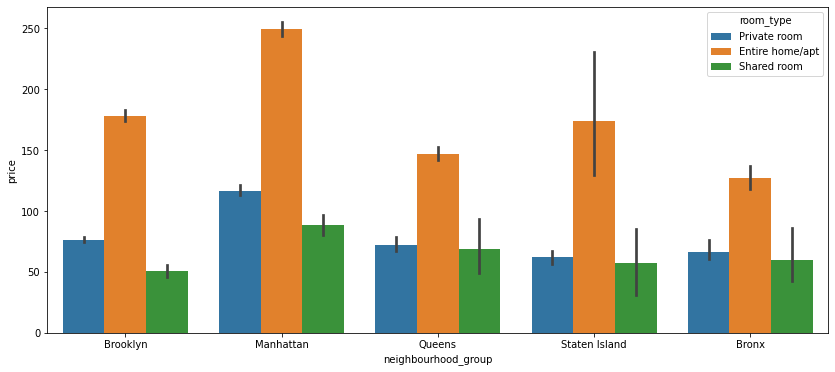

In [123]:
plt.figure(figsize=(14, 6))
sns.barplot(airbnb.neighbourhood_group, airbnb.price, hue=airbnb.room_type)

**From the above barplot we can infer below few points:**

*   Most expensive neighbourhood_group is Manhattan
*   Most cheapest neighbourhood_group is Bronx.
*   The price of entire home/apt is more than any other room type.

In [124]:
airbnb.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


**Encoding the categorical values into numerical values**

In [125]:
enc = OneHotEncoder()
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(airbnb[['neighbourhood_group']]).toarray())
enc_df
enc_df.columns = ['Bronx','Brooklyn', 'Manhattan', 'Queens', 'Staten Island'] 

enc_df.apply(np.int64)

enc_df1 = pd.DataFrame(enc.fit_transform(airbnb[['room_type']]).toarray())
enc_df1
enc_df1.columns = ['Entire home/apt', 'Private room', 'Shared room'] 

enc_df1.apply(np.int64)

airbnb1 =airbnb.join(enc_df)
airbnb2 =airbnb1.join(enc_df1)
airbnbfinal=airbnb2.drop(['neighbourhood_group', 'room_type'],axis=1)
airbnbfinal.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room
0,40.64749,-73.97237,149,1,9,0.21,6,365,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,40.75362,-73.98377,225,1,45,0.38,2,355,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,40.80902,-73.94190,150,3,0,0.00,1,365,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,40.68514,-73.95976,89,1,270,4.64,1,194,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,40.79851,-73.94399,80,10,9,0.10,1,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [126]:
airbnbfinal.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327,0.022313,0.411167,0.443011,0.115881,0.007629,0.519665,0.456611,0.023724
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289,0.147701,0.492050,0.496747,0.320085,0.087009,0.499618,0.498119,0.152190
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


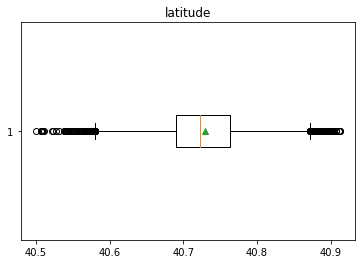

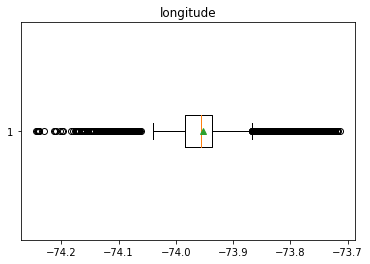

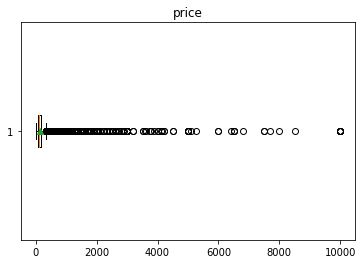

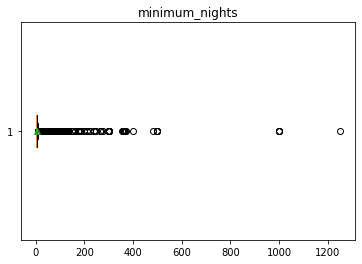

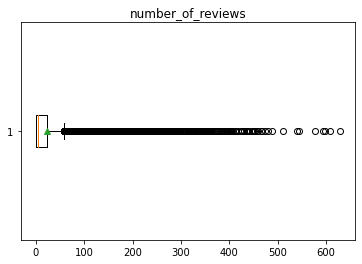

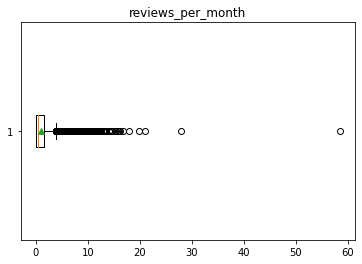

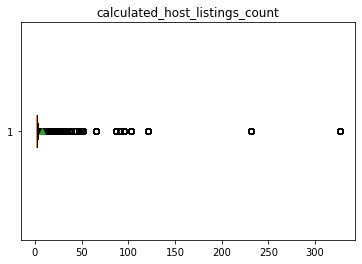

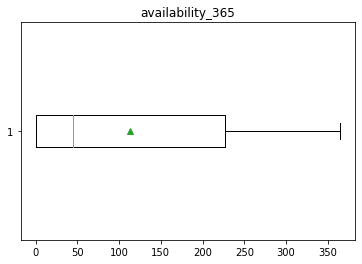

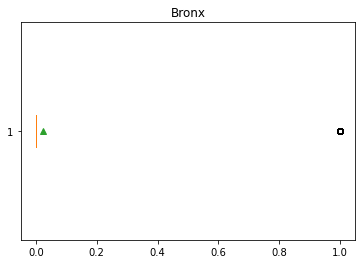

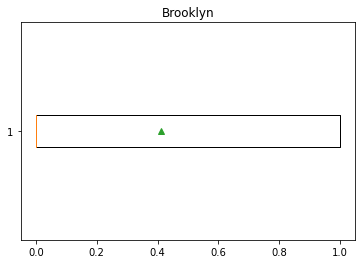

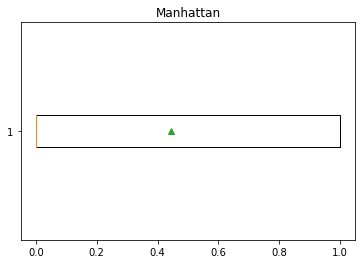

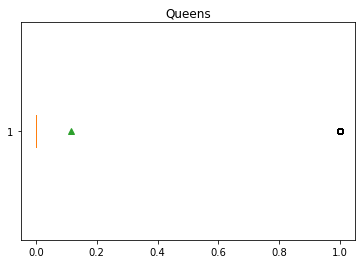

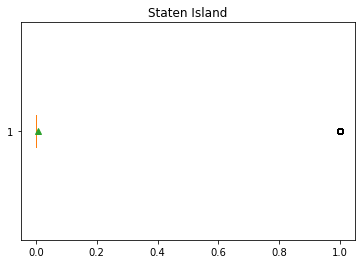

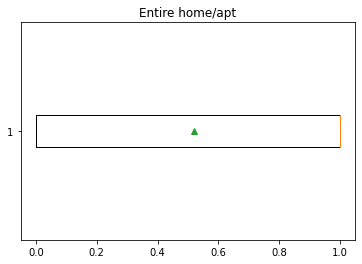

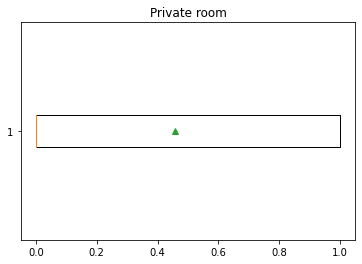

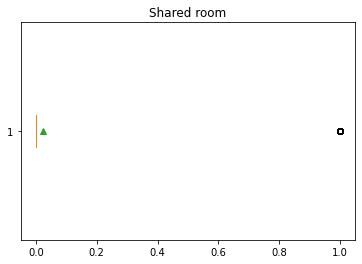

In [127]:
for i, col in enumerate(airbnbfinal.columns):
    plt.figure(i)
    plt.title(col)
    plt.boxplot(airbnbfinal[col], vert=False, showmeans=True)

Box plot is a standard way to display the distribution of the data

**When mean is less than the median it is called as left skewed**

**When mean is greater than the median it is called as right skewed**

**Through the box plots we can deduce that there are many outliers of the predictor variables so the ranges does not makes sense**

# **Normalizing**

In [128]:
x = airbnbfinal[['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].values.astype(float)

min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x)

airbnbfinal[['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']] = pd.DataFrame(x_scaled)

In [129]:
airbnbfinal.head(10)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room
0,0.357393,0.511921,0.0149,0.000000,0.014308,0.003590,0.015337,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.614199,0.490469,0.0225,0.000000,0.071542,0.006496,0.003067,0.972603,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.748252,0.569257,0.0150,0.001601,0.000000,0.000000,0.000000,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.448496,0.535649,0.0089,0.000000,0.429253,0.079316,0.000000,0.531507,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.722820,0.565324,0.0080,0.007206,0.014308,0.001709,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,0.599802,0.506972,0.0200,0.001601,0.117647,0.010085,0.000000,0.353425,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6,0.452706,0.542800,0.0060,0.035228,0.077901,0.006838,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.641469,0.488286,0.0079,0.000801,0.683625,0.059316,0.000000,0.602740,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8,0.730733,0.521593,0.0079,0.000801,0.187599,0.016923,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9,0.516974,0.478050,0.0150,0.000000,0.254372,0.022735,0.009202,0.515068,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [130]:
#finding the correlation between all the features in the data
airbnbfinal.corr()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room
latitude,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.018758,0.019517,-0.010983,0.330669,-0.672932,0.590639,0.017145,-0.190894,-0.005712,0.004363,0.004473
longitude,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.138516,-0.114713,0.082731,0.221315,0.017735,-0.433531,0.622749,-0.291841,-0.192143,0.183613,0.029812
price,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.050564,0.057472,0.081829,-0.041030,-0.098603,0.163976,-0.080205,-0.013840,0.255857,-0.240246,-0.053613
minimum_nights,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.124905,0.127960,0.144303,-0.018186,-0.039658,0.067362,-0.032629,-0.009400,0.074900,-0.073837,-0.004218
number_of_reviews,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.589407,-0.072376,0.172028,0.009258,0.017414,-0.045820,0.035967,0.015088,-0.010087,0.017253,-0.023355
reviews_per_month,-0.018758,0.138516,-0.050564,-0.124905,0.589407,1.000000,-0.047312,0.163732,0.036390,-0.021512,-0.063723,0.107927,0.026648,-0.029565,0.030178,-0.001714
calculated_host_listings_count,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.047312,1.000000,0.225701,-0.022511,-0.123234,0.152842,-0.033881,-0.012838,0.112193,-0.108945,-0.011737
availability_365,-0.010983,0.082731,0.081829,0.144303,0.172028,0.163732,0.225701,1.000000,0.060806,-0.079671,-0.005434,0.087113,0.057885,-0.006804,-0.010986,0.058294
Bronx,0.330669,0.221315,-0.041030,-0.018186,0.009258,0.036390,-0.022511,0.060806,1.000000,-0.126239,-0.134730,-0.054693,-0.013245,-0.052092,0.042765,0.031041
Brooklyn,-0.672932,0.017735,-0.098603,-0.039658,0.017414,-0.021512,-0.123234,-0.079671,-0.126239,1.000000,-0.745240,-0.302527,-0.073265,-0.073905,0.079464,-0.017467


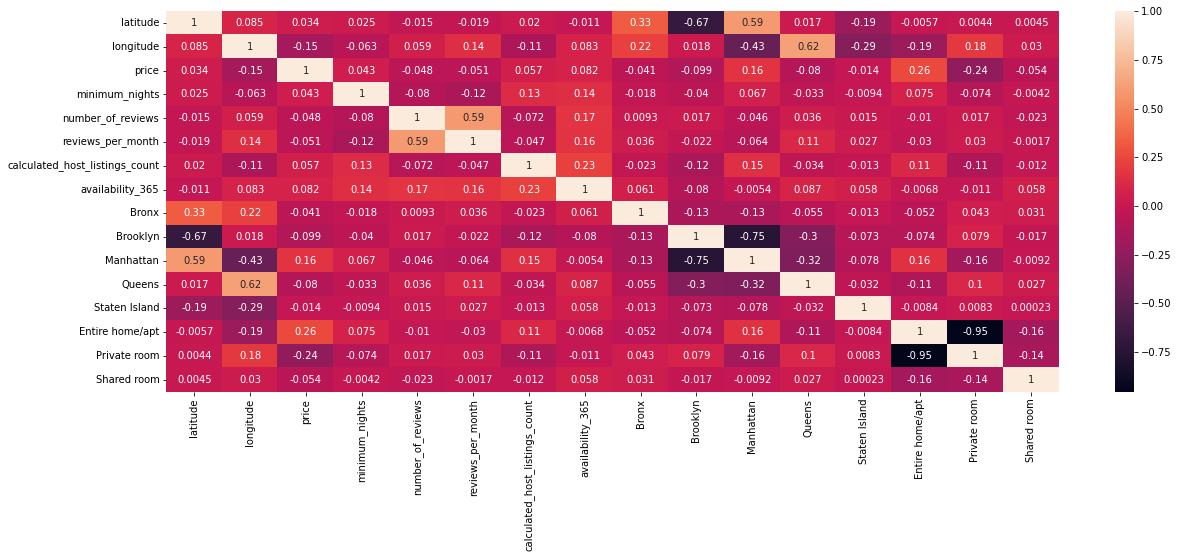

In [131]:
#plotting the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(airbnbfinal.corr(), annot=True)

**Checking Heatmap after encoding the categorical values and normalizing the data**

**Predictor variables independent of all the other predictor variables**

**Implementing OLS to check p and t value**

In [132]:
import statsmodels.api as sm

model = sm.OLS(airbnbfinal['price'], airbnbfinal[['latitude',	'longitude',	'minimum_nights',	'number_of_reviews',	'reviews_per_month','calculated_host_listings_count',	'availability_365',	'Bronx',	'Brooklyn',	'Manhattan',	'Queens','Staten Island',	'Entire home/apt',	'Private room',	'Shared room']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     410.6
Date:                Sat, 25 Sep 2021   Prob (F-statistic):               0.00
Time:                        00:05:23   Log-Likelihood:             1.1549e+05
No. Observations:               48895   AIC:                        -2.309e+05
Df Residuals:                   48881   BIC:                        -2.308e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
latitude                          -0.0087      0.001     -6.693      0.000      -0.011      -0.006
longitude                         -0.0263      0.002    -13.668      0.000      -0.030      -0.022
minimum_nights                    -0.0068      0.006     -1.046      0.296      -0.019       0.006
number_of_reviews                 -0.0153      0.002     -8.402      0.000      -0.019      -0.012
reviews_per_month                 -0.0177      0.005     -3.720      0.000      -0.027      -0.008
calculated_host_listings_count    -0.0057      0.001     -5.239      0.000      -0.008      -0.004
availability_365                   0.0072      0.000     23.231      0.000       0.007       0.008
Bronx                              0.0135      0.001     13.241      0.000       0.011       0.015
Brooklyn                           0.0101      0.000     21.510      0.000       0.009       0.011
Manhattan                          0.0163      0.001     31.868      0.000       0.015       0.017
Queens                             0.0130      0.001     17.238      0.000       0.012       0.015
Staten Island                     -0.0017      0.001     -1.572      0.116      -0.004       0.000
Entire home/apt                    0.0254      0.001     35.265      0.000       0.024       0.027
Private room                       0.0148      0.001     19.723      0.000       0.013       0.016
Shared room                        0.0111      0.001     12.023      0.000       0.009       0.013
==============================================================================
Omnibus:                   110388.487   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        994749619.423
Skew:                          21.451   Prob(JB):                         0.00
Kurtosis:                     700.445   Cond. No.                     8.06e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.2e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**The most significant p value is 0.05**

**With the help of p value we can drop minimum_nights and Staten Island, since they have p value greater than 0.05**

In [133]:
airbnbfinal.drop(['minimum_nights','Staten Island'], axis = 1, inplace = True)

**Dropping the independent variables whose p values are greater than 0.05**

**Implementing OLS again after dropping the insignificant independent variables**

In [134]:
import statsmodels.api as sm

model = sm.OLS(airbnbfinal['price'], airbnbfinal[['latitude',	'longitude','number_of_reviews',	'reviews_per_month','calculated_host_listings_count',	'availability_365',	'Bronx',	'Brooklyn',	'Manhattan',	'Queens',	'Entire home/apt',	'Private room',	'Shared room']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     444.7
Date:                Sat, 25 Sep 2021   Prob (F-statistic):               0.00
Time:                        00:05:24   Log-Likelihood:             1.1549e+05
No. Observations:               48895   AIC:                        -2.309e+05
Df Residuals:                   48882   BIC:                        -2.308e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
latitude                          -0.0087      0.001     -6.713      0.000      -0.011      -0.006
longitude                         -0.0262      0.002    -13.644      0.000      -0.030      -0.022
number_of_reviews                 -0.0153      0.002     -8.381      0.000      -0.019      -0.012
reviews_per_month                 -0.0172      0.005     -3.634      0.000      -0.027      -0.008
calculated_host_listings_count    -0.0057      0.001     -5.325      0.000      -0.008      -0.004
availability_365                   0.0071      0.000     23.344      0.000       0.007       0.008
Bronx                              0.0151      0.002      9.063      0.000       0.012       0.018
Brooklyn                           0.0117      0.001      8.883      0.000       0.009       0.014
Manhattan                          0.0179      0.001     13.401      0.000       0.015       0.021
Queens                             0.0147      0.001      9.896      0.000       0.012       0.018
Entire home/apt                    0.0237      0.001     18.150      0.000       0.021       0.026
Private room                       0.0131      0.001      9.929      0.000       0.010       0.016
Shared room                        0.0095      0.001      6.441      0.000       0.007       0.012
==============================================================================
Omnibus:                   110367.982   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        993498709.256
Skew:                          21.441   Prob(JB):                         0.00
Kurtosis:                     700.006   Cond. No.                         59.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**With the help of OLS and heatmap we can infer that Entire home/apt and Manhattan are the most significant variables**

# **Implementing Data Split**

In [135]:
from sklearn.model_selection import train_test_split
X = airbnbfinal[ ['latitude',	'longitude',	'number_of_reviews',	'reviews_per_month','calculated_host_listings_count',	'availability_365',	'Bronx',	'Brooklyn',	'Manhattan',	'Queens',	'Entire home/apt',	'Private room',	'Shared room']]
 
y = airbnbfinal['price']
 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train.head()

,latitude,longitude,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Bronx,Brooklyn,Manhattan,Queens,Entire home/apt,Private room,Shared room
25247,0.438841,0.629302,0.017488,0.008376,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0
33010,0.780918,0.556687,0.100159,0.091282,0.003067,0.802740,0.0,0.0,1.0,0.0,0.0,1.0,0.0
27349,0.397198,0.491956,0.003180,0.001709,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0
22371,0.618530,0.585063,0.143084,0.056581,0.024540,0.747945,0.0,0.0,0.0,1.0,0.0,1.0,0.0
45877,0.591792,0.446211,0.004769,0.035043,0.009202,0.430137,0.0,0.0,1.0,0.0,1.0,0.0,0.0


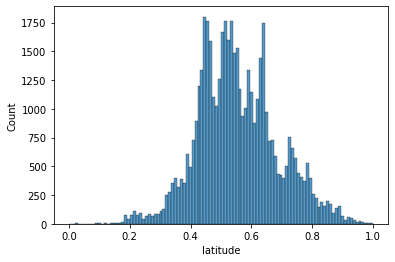

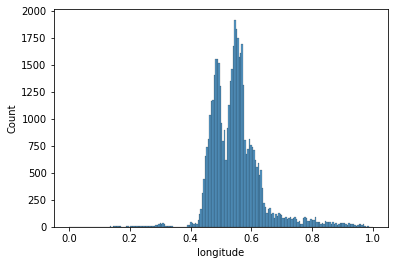

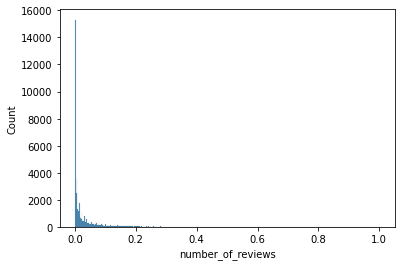

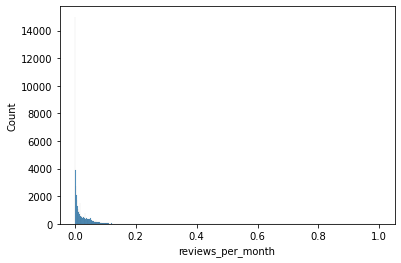

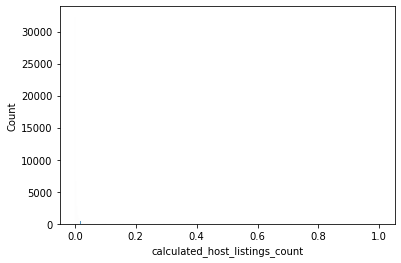

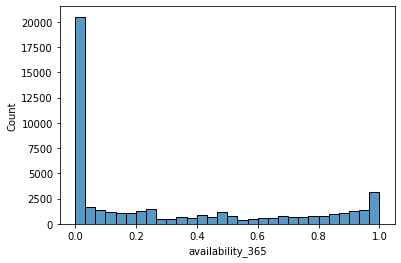

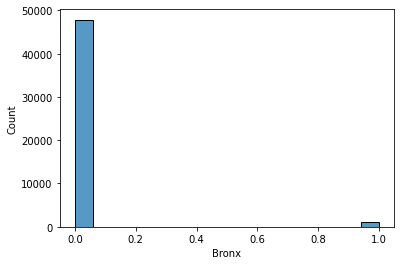

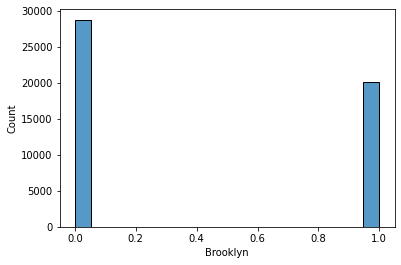

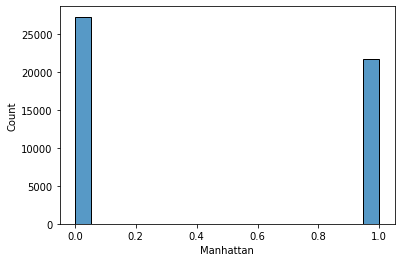

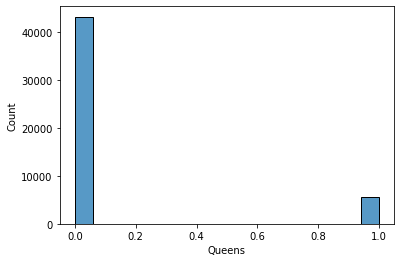

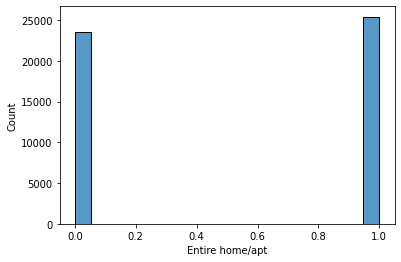

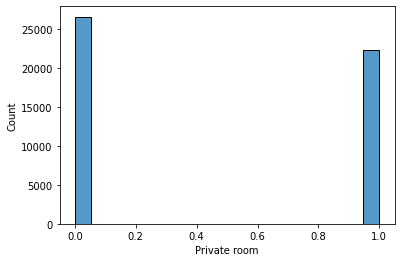

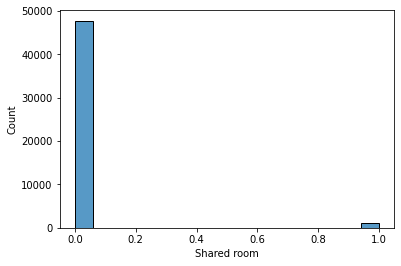

In [136]:
for i, col in enumerate(X.columns):
 plt.figure(i)
 sns.histplot(X[col])

**Plotting Train and Test datasets to check if they have the same data**

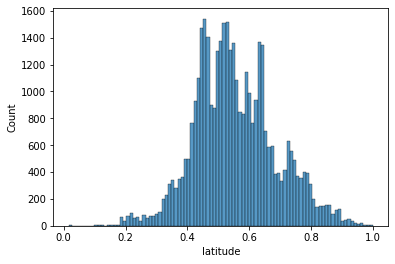

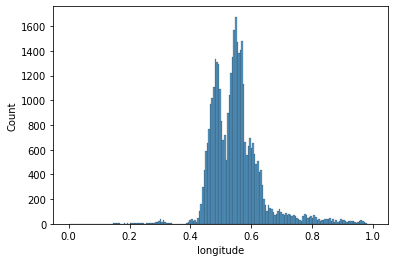

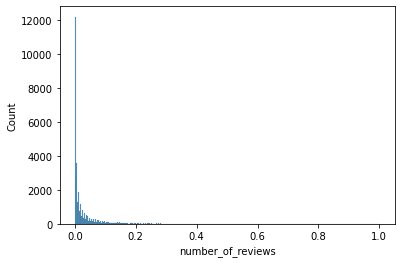

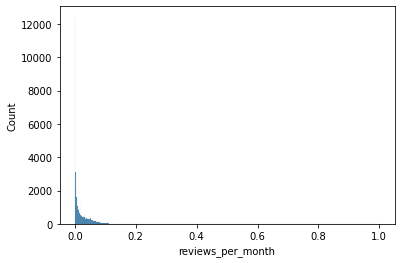

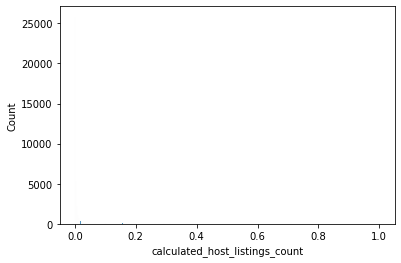

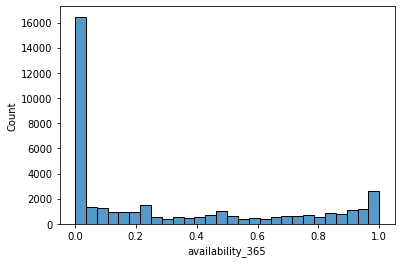

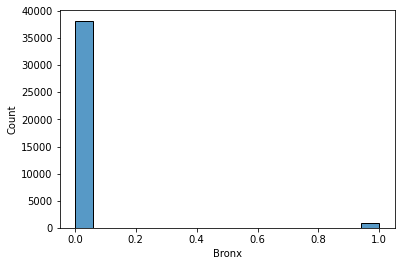

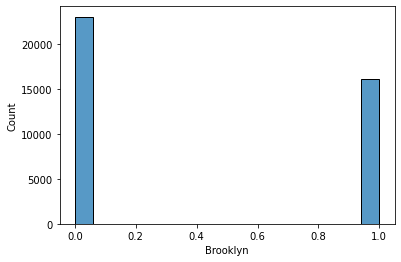

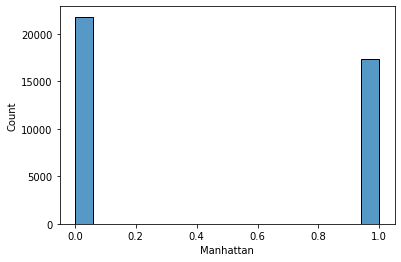

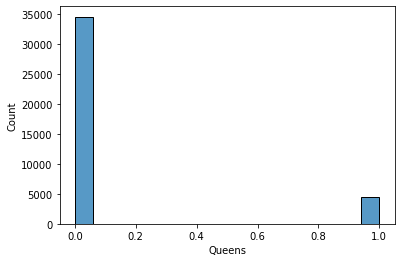

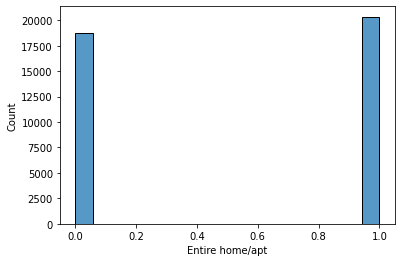

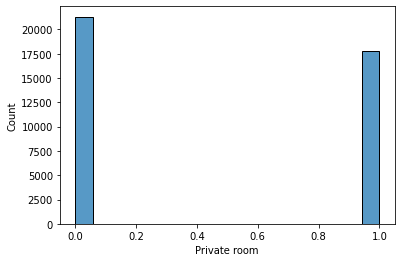

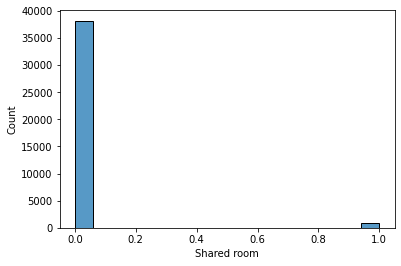

In [137]:
for i, col in enumerate(X_train.columns):
 plt.figure(i)
 sns.histplot(X_train[col])

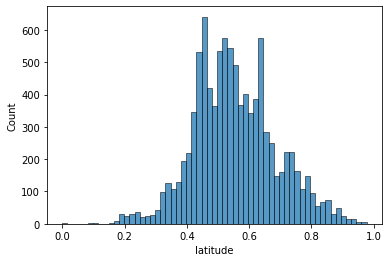

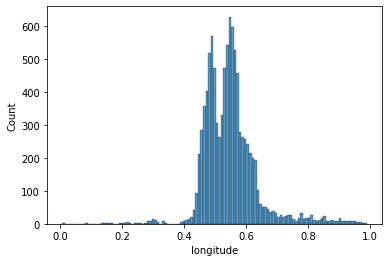

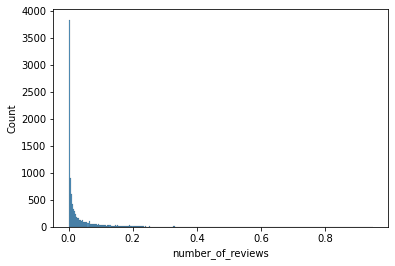

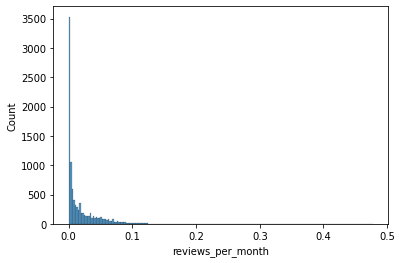

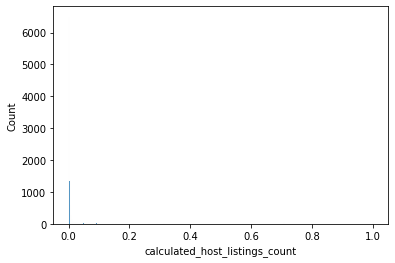

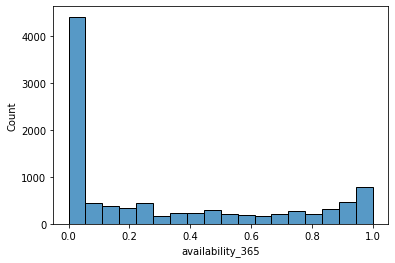

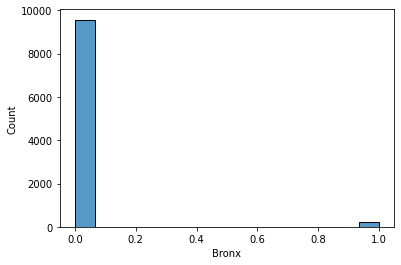

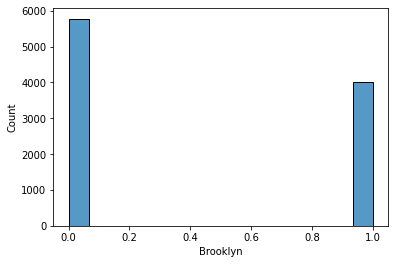

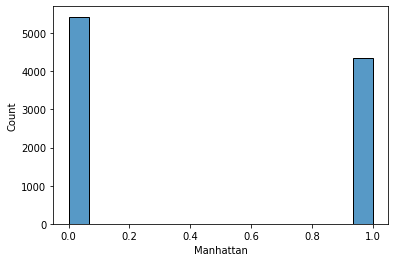

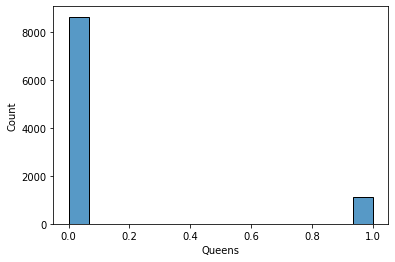

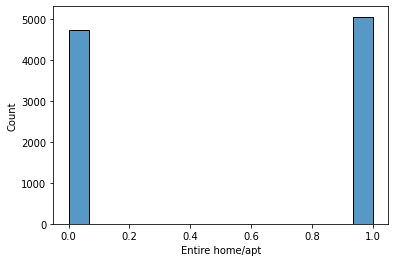

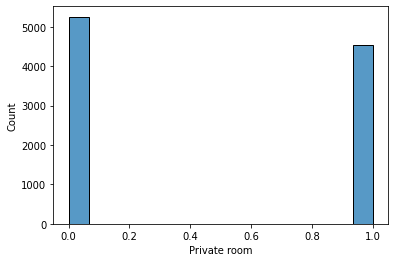

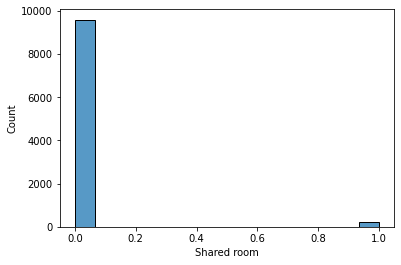

In [138]:
for i, col in enumerate(X_test.columns):
 plt.figure(i)
 sns.histplot(X_test[col])

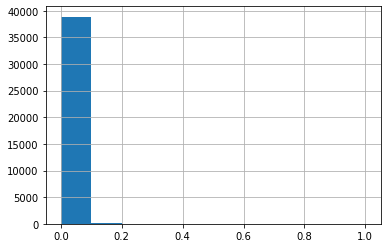

In [139]:
y_train.hist()

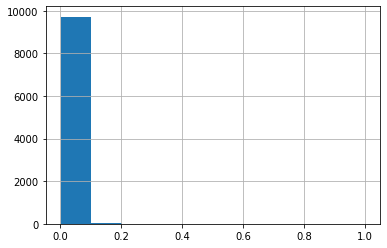

In [140]:
y_test.hist()

# **Conclusion**
* Which independent variables are useful to predict a target (dependent variable)?


With the help of OLS we were able to find that the below independent variables are useful to predict a target

latitude,	longitude,number_of_reviews,	reviews_per_month,calculated_host_listings_count,	availability_365,	Bronx,	Brooklyn,	Manhattan,	Queens,	Entire home/apt,	Private room,	Shared room




* Which independent variables have missing data? How much?

Name has 16 missing values

host_name has 21 missing values

last_review has 10052 missing values

reviews_per_month has 10052 missing values

* Do the training and test sets have the same data?

With the help of above histogram plots of train and test data we can see that the distributions of both the data are similar but the train and test data has different counts which defines that the train and test sets do not have same data

* In the predictor variables independent of all the other predictor variables?

Heatmap helped us to define that the predictor variables are independent of all other predictor variables

* Which predictor variables are the most important?

Entire home/apt and Manhattan are the independent variables useful to predict a target

* Do the ranges of the predictor variables make sense?

With the help of boxplot we were able to view many outliers for independent variables which defines that the ranges of the predictor variables does not makes sense

* What are the distributions of the predictor variables? 

From the above graphs we can infer that only two independent variables are normally distributed and the categorical values which are encoded are reflected in 0 and 1


# **References**


1.   https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data
2.   Refered Towards Data Science
3.   https://scikit-learn.org/stable/modules/preprocessing.html
4.   https://github.com/abhi-gm/Machine-Learning-Workshop/blob/main/1_Linear_regression.ipynb

The Kaggle was used to get the dataset and referred few tasks. Referred to TA github account and towards data science to learn about OLS and normalization. Scikit learn used to learn about preprocessing and encoding.

Copyright 2021 Ronak Bhushan Patil

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE